# Inverse Kinematics (2D)

In [1]:
%matplotlib notebook
from matplotlib import pylab as plt
from numpy import sin, cos, pi, matrix, random
from __future__ import division
from math import atan2
from IPython import display
from ipywidgets import interact, fixed

## Coordinate Transformation

In [2]:
def trans(x, y, a):
    '''create a 2D transformation'''
    s = sin(a)
    c = cos(a)
    return matrix([[c, -s, x],
                   [s,  c, y],
                   [0,  0, 1]])

def from_trans(m):
    '''get x, y, theta from transform matrix'''
    return [m[0, -1], m[1, -1], atan2(m[1, 0], m[0, 0])]

In [3]:
trans(0, 0, 0)

matrix([[ 1., -0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

## Parameters of robot arm

In [4]:
N = 3  # number of links
l = [0] + range(N, 0, -1)  # length of link, l[0] is ingored
max_len = sum(l)
a = random.random_sample(N)  # angles of joints
T0 = trans(0, 0, 0)  # base

## Forward Kinematics

In [5]:
def forward_kinematics(T0, l, a):
    T = [T0]
    for i in range(len(a)):
        Ti = T[-1] * trans(l[i], 0, a[i])
        T.append(Ti)
    Te = T[-1] * trans(l[-1], 0, 0)  # end effector
    T.append(Te)
    return T

In [6]:
def show_robot_arm(T):
    plt.cla()
    x = [Ti[0,-1] for Ti in T]
    y = [Ti[1,-1] for Ti in T]
    plt.plot(x, y, '-or', linewidth=5, markersize=10)
    plt.plot(x[-1], y[-1], 'og', linewidth=5, markersize=10)
    plt.xlim([-max_len, max_len])
    plt.ylim([-max_len, max_len]) 
    ax = plt.axes()
    ax.set_aspect('equal')
    t = atan2(T[-1][1, 0], T[-1][0,0])
    ax.annotate('[%.2f,%.2f,%.2f]' % (x[-1], y[-1], t), xy=(x[-1], y[-1]), xytext=(x[-1], y[-1] + 0.5))
    plt.show()

## Inverse Kinematics

## Analytical Solutions with Sympy

[SymPy](http://sympy.org/) is a Python library for symbolic mathematics.

In [7]:
from sympy import init_printing, sin, cos, pi, asin, acos, atan2, atan, sqrt, simplify, solve, latex, symbols
from sympy import Matrix as matrix
init_printing()

In [8]:
from sympy.abc import x, y, theta
trans(x, y, theta)

⎡cos(θ)  -sin(θ)  x⎤
⎢                  ⎥
⎢sin(θ)  cos(θ)   y⎥
⎢                  ⎥
⎣  0        0     1⎦

In [9]:
N = 3
l = [symbols('l_%d' % i) for i in range(N + 1)]
l[0] = 0
a = [symbols('theta_%d' % i) for i in range(N)]
T0 = trans(0, 0, 0)

In [10]:
l, a

In [11]:
T0

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [12]:
T = forward_kinematics(T0, l, a)
Te = T[-1]
Te

⎡(-sin(θ₀)⋅sin(θ₁) + cos(θ₀)⋅cos(θ₁))⋅cos(θ₂) + (-sin(θ₀)⋅cos(θ₁) - sin(θ₁)⋅co
⎢                                                                             
⎢(-sin(θ₀)⋅sin(θ₁) + cos(θ₀)⋅cos(θ₁))⋅sin(θ₂) + (sin(θ₀)⋅cos(θ₁) + sin(θ₁)⋅cos
⎢                                                                             
⎣                                             0                               

s(θ₀))⋅sin(θ₂)  -(-sin(θ₀)⋅sin(θ₁) + cos(θ₀)⋅cos(θ₁))⋅sin(θ₂) + (-sin(θ₀)⋅cos(
                                                                              
(θ₀))⋅cos(θ₂)    (-sin(θ₀)⋅sin(θ₁) + cos(θ₀)⋅cos(θ₁))⋅cos(θ₂) - (sin(θ₀)⋅cos(θ
                                                                              
                                                             0                

θ₁) - sin(θ₁)⋅cos(θ₀))⋅cos(θ₂)  l₁⋅cos(θ₀) + l₂⋅(-sin(θ₀)⋅sin(θ₁) + cos(θ₀)⋅co
                                                                              
₁) + sin(θ₁)⋅cos(θ₀))⋅sin(θ₂)    l₁⋅sin(θ₀) + l₂⋅(

In [13]:
Te = simplify(Te)
Te

⎡cos(θ₀ + θ₁ + θ₂)  -sin(θ₀ + θ₁ + θ₂)  l₁⋅cos(θ₀) + l₂⋅cos(θ₀ + θ₁) + l₃⋅cos(
⎢                                                                             
⎢sin(θ₀ + θ₁ + θ₂)  cos(θ₀ + θ₁ + θ₂)   l₁⋅sin(θ₀) + l₂⋅sin(θ₀ + θ₁) + l₃⋅sin(
⎢                                                                             
⎣        0                  0                                    1            

θ₀ + θ₁ + θ₂)⎤
             ⎥
θ₀ + θ₁ + θ₂)⎥
             ⎥
             ⎦

In [14]:
eq = Te * trans(x, y, theta).inv() - T0
eq

⎡⎛     2       ⎞                                                              
⎢⎝- sin (θ) + 1⎠⋅cos(θ₀ + θ₁ + θ₂)                                            
⎢───────────────────────────────── + sin(θ)⋅sin(θ₀ + θ₁ + θ₂) - 1    sin(θ)⋅co
⎢              cos(θ)                                                         
⎢                                                                             
⎢  ⎛     2       ⎞                                                            
⎢  ⎝- sin (θ) + 1⎠⋅sin(θ₀ + θ₁ + θ₂)                                          
⎢  ───────────────────────────────── - sin(θ)⋅cos(θ₀ + θ₁ + θ₂)    sin(θ)⋅sin(
⎢                cos(θ)                                                       
⎢                                                                             
⎣                               0                                             

                                                                              
                                                   

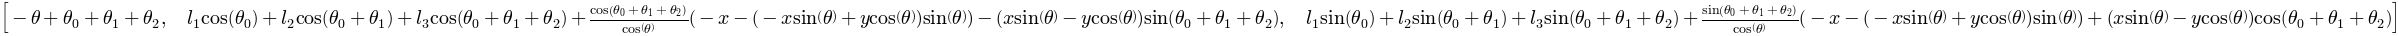

In [15]:
eq = [a[0] + a[1] + a[2] - theta, eq[0, 2], eq[1, 2]]
eq

In [16]:
# solve(eq, a)  # sympy is too stupid to solve it

### cosine rule

In [17]:
# now we use cosine rule to solve the equation

b = [symbols('theta_%d' % i) for i in range(N)]  # target angles
T3 = trans(x, y, theta) * trans(l[3], 0, 0).inv()
l_1_2 = T3[0,-1] ** 2 + T3[1,-1] ** 2
b_1_2 = acos((l[1] ** 2 + l[2] ** 2 - l_1_2) / (2 * l[1] * l[2]))  # cosine rule
b[1] = pi - b_1_2
b_1 = acos((l[1] ** 2 - l[2] ** 2 + l_1_2) / (2 * l[1] * sqrt(l_1_2)))  # cosine rule
b_0 = atan(T3[1,-1] / T3[0,-1])
b[0] = b_0 - b_1
b[2] = atan(T3[1,0] / T3[0,0]) - b[0] - b[1]
B = matrix([b]).T
B = simplify(B)
B  # vector of target angles, e.g. [theta_0, theta_1, theta_2]

⎡                                             ⎛  2     2                  2   
⎢                                             ⎜l₁  - l₂  + (l₃⋅sin(θ) - y)  + 
⎢                                       - acos⎜───────────────────────────────
⎢                                             ⎜         ______________________
⎢                                             ⎜        ╱                2     
⎢                                             ⎝ 2⋅l₁⋅╲╱  (l₃⋅sin(θ) - y)  + (l
⎢                                                                             
⎢                                                      ⎛  2     2             
⎢                                                      ⎜l₁  + l₂  - (l₃⋅sin(θ)
⎢                                                - acos⎜──────────────────────
⎢                                                      ⎝                    2⋅
⎢                                                                             
⎢    ⎛  2     2                   2                 

In [18]:
# print latex(B)

In [19]:
# validate the results by forward kinematics

T_new = forward_kinematics(T0, l, b)
Te_new = T_new[-1]
Te_new  # should be same as Te, e.g. trans(x, y, theta)

⎡  ⎛                                                                          
⎢  ⎜                                                                          
⎢  ⎜       __________________________________________________________         
⎢  ⎜      ╱                                                        2          
⎢  ⎜     ╱      ⎛  2     2                   2                   2⎞      ⎛    
⎢  ⎜    ╱       ⎝l₁  + l₂  - (-l₃⋅sin(θ) + y)  - (-l₃⋅cos(θ) + x) ⎠      ⎜    
⎢- ⎜   ╱    1 - ──────────────────────────────────────────────────── ⋅sin⎜acos
⎢  ⎜  ╱                                  2   2                           ⎜    
⎢  ⎜╲╱                               4⋅l₁ ⋅l₂                            ⎜    
⎢  ⎝                                                                     ⎝    
⎢                                                                             
⎢   ⎛                                                                         
⎢   ⎜                                               

In [20]:
# we could simplify the result, but Sympy can't give result
# simplify(Te_new[0, 0])  # --> cos(theta)

In [21]:
# simplify(Te_new[1, 0])  # --> sin(theta)

In [22]:
# simplify(Te_new[0, -1])  # --> x

### Test the analytical solution

<IPython.core.display.Javascript object>


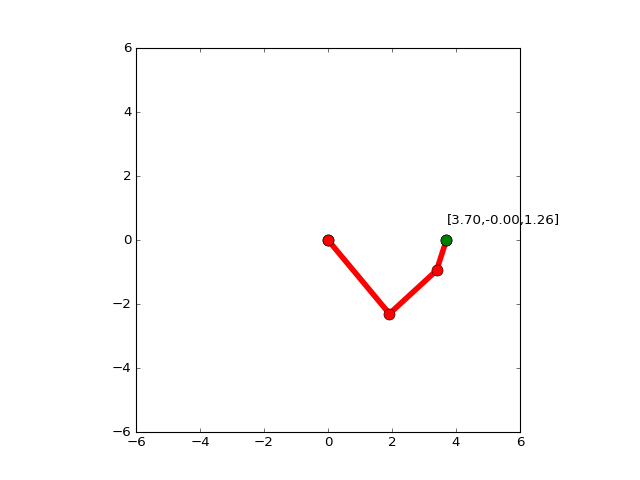

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTUuMCwgZGVzY3JpcHRpb249dSd4X2UnLCBtYXg9Ni4wKSwgRmxvYXRTbGlkZXIodmFsdWU9MC4wLCBkZXNjcmlwdGlvbj3igKY=


In [23]:
from numpy import sin, cos, pi, matrix, random
from math import atan2, acos

T0 = trans(0, 0, 0)
lv = [0, 3, 2, 1]  # length of link, l[0] is ingored
bf = B
for i in range(N):
    bf = bf.subs(l[i + 1], lv[i + 1])

def inverse_kinematics(x_e, y_e, theta_e):
    b = bf.subs(x, x_e).subs(y, y_e).subs(theta, theta_e)
    b = (b.subs('I', 1).subs('pi', pi).tolist())
    b = [float(i[0]) for i in b]
    return b

T = forward_kinematics(T0, lv, random.random(N))
show_robot_arm(T)
@interact(x_e=(0, max_len, 0.1), y_e=(-max_len, max_len, 0.1), theta_e=(-pi, pi, 0.1))
def set_end_effector(x_e=5, y_e=0, theta_e=0):
    b = inverse_kinematics(x_e, y_e, theta_e)
    T = forward_kinematics(T0, lv, b)
    show_robot_arm(T)